# 蛮力特征匹配

### Brute-Force匹配器也就是蛮力匹配器，它的工作原理是：在第一幅图像上选取一个关键点，然后依次与第二幅图像的每个特征点进行距离测试，最后返回距离最近的特征点。

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

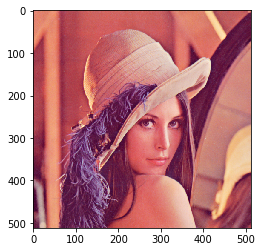

In [3]:
img = cv2.imread("lena_std.tif")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #调换通道使原图颜色显示正常
plt.imshow(img)

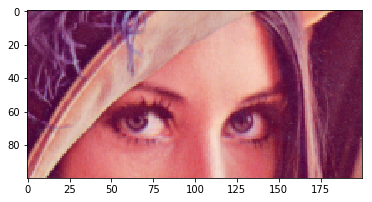

In [4]:
img_new = img[200: 300, 200:400] #从图像中切分部分区域，便于进行特征匹配
plt.imshow(img_new)

### 对于BF匹配器，我们首先要使用cv.BFMatcher()创建一个BFMatcher对象。它有两个可选参数。

### 第一个是normType，它用来指定要使用的距离测试类型。
### 当该参数为cv.NORM_L2（默认值）,这个类型很适合SIFT和SURF等（cv.NORM_L1也可以）。
### 当该参数为cv.NORM_HAMMING，对于使用二进制描述符的ORB,BRIEF,BRISK算法等，会返回两个测试对象间的汉明距离。如果ORB算法的参数设置为MTA_K==3或4，则此处设置为cv.NORM_HAMMING2。

## 创建ORB对象

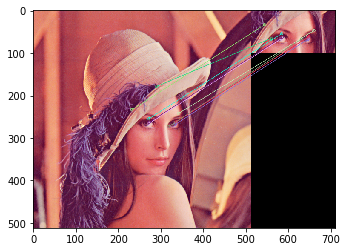

In [5]:
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img, None)
kp2, des2 = orb.detectAndCompute(img_new, None)

#创建bf对象，并设定初始值
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)  #生成一个匹配器
matches = bf.match(des1, des2) #bf.match()函数匹配最佳特征点（一点对一点）

#将匹配结果按特征点之间的距离进行降序排列
matches = sorted(matches, key= lambda x:x.distance)

#匹配前10个特征最接近的特征点
img_match = cv2.drawMatches(img, kp1, img_new, kp2, matches[:10], None, flags=2) #画出匹配线
plt.imshow(img_match)

## 创建SIFT对象

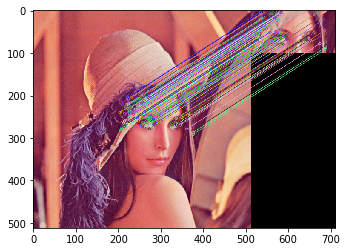

In [6]:
#创建SIFT对象
sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(img, None)
kp2, des2 = sift.detectAndCompute(img_new, None)

#创建bf对象，并设定初始值使用默认参数 cv.Norm_L2 ,crossCheck=False
bf = cv2.BFMatcher() #生成一个匹配器
matches = bf.knnMatch(des1, des2, k=2) #bf.knnMatch()函数为每个特征点匹配另一幅图像的前k个特征点

#比值测试，首先获取与A距离最近的点B（最近）和C（次近），只有当B/C小于阈值时m才被认为是匹配
#因为假设匹配是一一对应的，真正的匹配的理想距离是0
f = 0.5 #设置阈值
match_nn = []
for m, n in matches:
    if m.distance < f*n.distance: #系数越小，匹配的严格程度越高，当然保留匹配的特征点也会越少
        match_nn.append([m])
img_match = cv2.drawMatchesKnn(img, kp1, img_new, kp2, match_nn, None, flags=2) #画出匹配线
plt.imshow(img_match)

In [ ]:
print()